<a href="https://colab.research.google.com/github/amien1410/amien-scrapers/blob/main/Task_Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
raw_lines = """
C001,2025-03-02,Lisa Tan,"Child was very focused during the art activity and offered to help peers arrange materials."
C002,2025-03-02,Mark Lim,"Became upset when losing the group quiz but calmed down after peer encouragement."
C003,2025-03-02,Siti Rahman,"Initially shy, but volunteered to lead a small group during discussion."
C004,2025-03-02,Anita Ong,"Appeared distracted throughout; needed multiple prompts to participate."
C005,2025-03-02,Wei Jun,"Stayed quiet most of the time, but smiled and responded when spoken to individually."
C006,2025-03-09,Lisa Tan,"Worked well with peers, showed leadership by assigning roles fairly."
C007,2025-03-09,Mark Lim,"Was disengaged at first but showed curiosity during the science game."
C008,2025-03-09,Siti Rahman,"Expressed frustration when group disagreed with her idea, withdrew briefly then rejoined."
C009,2025-03-09,Anita Ong,"Was enthusiastic during physical activity, encouraged others to participate."
C010,2025-03-09,Wei Jun,"Struggled to stay on task, distracted others occasionally."
C011,2025-03-16,Lisa Tan,"Displayed empathy by helping a classmate who forgot their materials."
C012,2025-03-16,Mark Lim,"Was hesitant to speak in group, but gave a detailed answer when called on."
C013,2025-03-16,Siti Rahman,"Showed resilience after making a mistake in drawing; restarted and completed work proudly."
C014,2025-03-16,Anita Ong,"Dominated the group discussion; needs to practice turn-taking."
C015,2025-03-16,Wei Jun,"Remained focused for the full session and gave thoughtful feedback to peers."
C016,2025-03-23,Lisa Tan,"Got distracted mid-activity, but recovered focus after facilitator check-in."
C017,2025-03-23,Mark Lim,"Actively supported teammates during problem-solving; demonstrated patience."
C018,2025-03-23,Siti Rahman,"Showed frustration during math puzzle, but persisted until solved."
C019,2025-03-23,Anita Ong,"Avoided eye contact most of the session, minimal participation."
C020,2025-03-23,Wei Jun,"Displayed consistent energy, encouraged quieter peers to join conversation."
""".strip().split('\n')

In [2]:
import pandas as pd
import re

pattern = re.compile(r'(?P<Child_ID>C\d{3}),(?P<Session_Date>\d{4}-\d{2}-\d{2}),(?P<Facilitator>[^,]+),"(?P<Observation_Text>.*)"')
rows = []
for line in raw_lines:
    m = pattern.match(line)
    if m:
        rows.append(m.groupdict())

df = pd.DataFrame(rows)
df['Session_Date'] = pd.to_datetime(df['Session_Date']).dt.date
df = df[['Child_ID','Session_Date','Observation_Text','Facilitator']]
df

,Child_ID,Session_Date,Observation_Text,Facilitator
0,C001,2025-03-02,Child was very focused during the art activity...,Lisa Tan
1,C002,2025-03-02,Became upset when losing the group quiz but ca...,Mark Lim
2,C003,2025-03-02,"Initially shy, but volunteered to lead a small...",Siti Rahman
3,C004,2025-03-02,Appeared distracted throughout; needed multipl...,Anita Ong
4,C005,2025-03-02,"Stayed quiet most of the time, but smiled and ...",Wei Jun
5,C006,2025-03-09,"Worked well with peers, showed leadership by a...",Lisa Tan
6,C007,2025-03-09,Was disengaged at first but showed curiosity d...,Mark Lim
7,C008,2025-03-09,Expressed frustration when group disagreed wit...,Siti Rahman
8,C009,2025-03-09,"Was enthusiastic during physical activity, enc...",Anita Ong
9,C010,2025-03-09,"Struggled to stay on task, distracted others o...",Wei Jun


In [3]:
def score_emotional_regulation(text):
    text = text.lower()
    score = 3
    pos = ['calm','calmed','recovered','persist','persisted','focused','smiled','patience','encouraged','rejoined']
    neg = ['upset','frustrat','angry','withdraw','withdrawn','distract','struggled','hesitant','shy','avoided']
    for kw in pos:
        if kw in text: score += 1
    for kw in neg:
        if kw in text: score -= 1
    return max(1, min(5, score))

def score_social_integration(text):
    text = text.lower()
    score = 3
    pos = ['help','helped','helping','led','leadership','encourag','joined','supported','participat','volunteer','worked well','encouraged quieter']
    neg = ['quiet','quietly','avoided','withdraw','dominat','minimal participation','needed multiple prompts','distract others']
    for kw in pos:
        if kw in text: score += 1
    for kw in neg:
        if kw in text: score -= 1
    return max(1, min(5, score))

In [4]:
df['Emotional_Regulation_Score'] = df['Observation_Text'].apply(score_emotional_regulation)
df['Social_Integration_Score']  = df['Observation_Text'].apply(score_social_integration)
df

,Child_ID,Session_Date,Observation_Text,Facilitator,Emotional_Regulation_Score,Social_Integration_Score
0,C001,2025-03-02,Child was very focused during the art activity...,Lisa Tan,4,4
1,C002,2025-03-02,Became upset when losing the group quiz but ca...,Mark Lim,4,4
2,C003,2025-03-02,"Initially shy, but volunteered to lead a small...",Siti Rahman,2,4
3,C004,2025-03-02,Appeared distracted throughout; needed multipl...,Anita Ong,2,3
4,C005,2025-03-02,"Stayed quiet most of the time, but smiled and ...",Wei Jun,4,3
5,C006,2025-03-09,"Worked well with peers, showed leadership by a...",Lisa Tan,3,5
6,C007,2025-03-09,Was disengaged at first but showed curiosity d...,Mark Lim,3,3
7,C008,2025-03-09,Expressed frustration when group disagreed wit...,Siti Rahman,3,4
8,C009,2025-03-09,"Was enthusiastic during physical activity, enc...",Anita Ong,4,5
9,C010,2025-03-09,"Struggled to stay on task, distracted others o...",Wei Jun,1,4


In [5]:
assert df['Emotional_Regulation_Score'].between(1,5).all()
assert df['Social_Integration_Score'].between(1,5).all()

In [6]:
def summarize_resilience(text):
    t = text.lower()
    if any(k in t for k in ['persist','rejoined','restarted','recovered','proudly']):
        return 'Displayed persistence/recovery'
    if any(k in t for k in ['frustrat','upset','withdraw','withdrew']):
        return 'Experienced frustration or withdrawal'
    if any(k in t for k in ['help','empathy','supported','encouraged']):
        return 'Showed prosocial behaviour / empathy'
    return 'No clear resilience signal'
df['Resilience_Notes_Summary'] = df['Observation_Text'].apply(summarize_resilience)
df

,Child_ID,Session_Date,Observation_Text,Facilitator,Emotional_Regulation_Score,Social_Integration_Score,Resilience_Notes_Summary
0,C001,2025-03-02,Child was very focused during the art activity...,Lisa Tan,4,4,Showed prosocial behaviour / empathy
1,C002,2025-03-02,Became upset when losing the group quiz but ca...,Mark Lim,4,4,Experienced frustration or withdrawal
2,C003,2025-03-02,"Initially shy, but volunteered to lead a small...",Siti Rahman,2,4,No clear resilience signal
3,C004,2025-03-02,Appeared distracted throughout; needed multipl...,Anita Ong,2,3,No clear resilience signal
4,C005,2025-03-02,"Stayed quiet most of the time, but smiled and ...",Wei Jun,4,3,No clear resilience signal
5,C006,2025-03-09,"Worked well with peers, showed leadership by a...",Lisa Tan,3,5,No clear resilience signal
6,C007,2025-03-09,Was disengaged at first but showed curiosity d...,Mark Lim,3,3,No clear resilience signal
7,C008,2025-03-09,Expressed frustration when group disagreed wit...,Siti Rahman,3,4,Displayed persistence/recovery
8,C009,2025-03-09,"Was enthusiastic during physical activity, enc...",Anita Ong,4,5,Showed prosocial behaviour / empathy
9,C010,2025-03-09,"Struggled to stay on task, distracted others o...",Wei Jun,1,4,No clear resilience signal


In [7]:
df.to_csv("cleaned_dataset.csv")

# PART 2

In [8]:
agg_child = df.groupby('Child_ID')[['Emotional_Regulation_Score','Social_Integration_Score']].mean().reset_index()
agg_session = df.groupby('Session_Date')[['Emotional_Regulation_Score','Social_Integration_Score']].mean().reset_index()

# pivot: rows per Session_Date, columns per Child_ID
pivot = df.pivot_table(index='Session_Date', columns='Child_ID', values='Emotional_Regulation_Score')
# Visualize for selected children or small multiples

res_counts = df['Resilience_Notes_Summary'].value_counts().reset_index()

df['At_Risk'] = ((df['Emotional_Regulation_Score'] <= 2) | (df['Social_Integration_Score'] <= 2))
risk_counts = df.groupby('Child_ID')['At_Risk'].sum().reset_index().sort_values('At_Risk', ascending=False)

df[['Emotional_Regulation_Score','Social_Integration_Score']].corr()
df

,Child_ID,Session_Date,Observation_Text,Facilitator,Emotional_Regulation_Score,Social_Integration_Score,Resilience_Notes_Summary,At_Risk
0,C001,2025-03-02,Child was very focused during the art activity...,Lisa Tan,4,4,Showed prosocial behaviour / empathy,False
1,C002,2025-03-02,Became upset when losing the group quiz but ca...,Mark Lim,4,4,Experienced frustration or withdrawal,False
2,C003,2025-03-02,"Initially shy, but volunteered to lead a small...",Siti Rahman,2,4,No clear resilience signal,True
3,C004,2025-03-02,Appeared distracted throughout; needed multipl...,Anita Ong,2,3,No clear resilience signal,True
4,C005,2025-03-02,"Stayed quiet most of the time, but smiled and ...",Wei Jun,4,3,No clear resilience signal,False
5,C006,2025-03-09,"Worked well with peers, showed leadership by a...",Lisa Tan,3,5,No clear resilience signal,False
6,C007,2025-03-09,Was disengaged at first but showed curiosity d...,Mark Lim,3,3,No clear resilience signal,False
7,C008,2025-03-09,Expressed frustration when group disagreed wit...,Siti Rahman,3,4,Displayed persistence/recovery,False
8,C009,2025-03-09,"Was enthusiastic during physical activity, enc...",Anita Ong,4,5,Showed prosocial behaviour / empathy,False
9,C010,2025-03-09,"Struggled to stay on task, distracted others o...",Wei Jun,1,4,No clear resilience signal,True


✅ Charts generated and saved in: /content/charts
- chart_trends.png
- chart_resilience.png
- chart_child_avg.png
- chart_at_risk.png


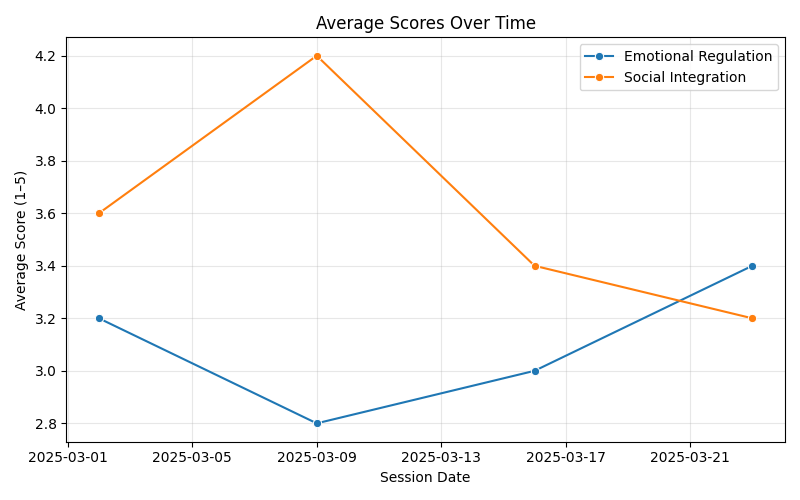

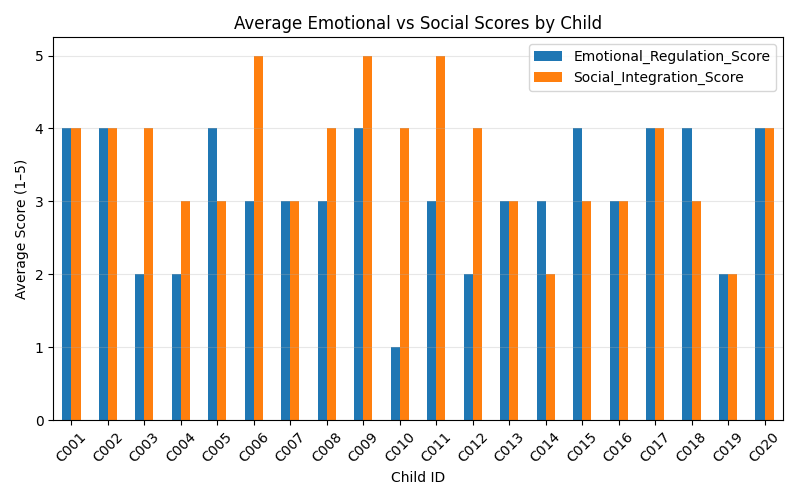

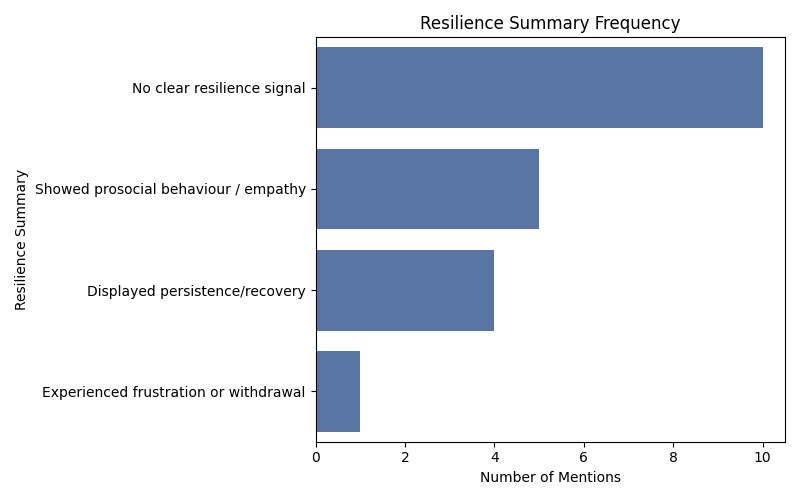

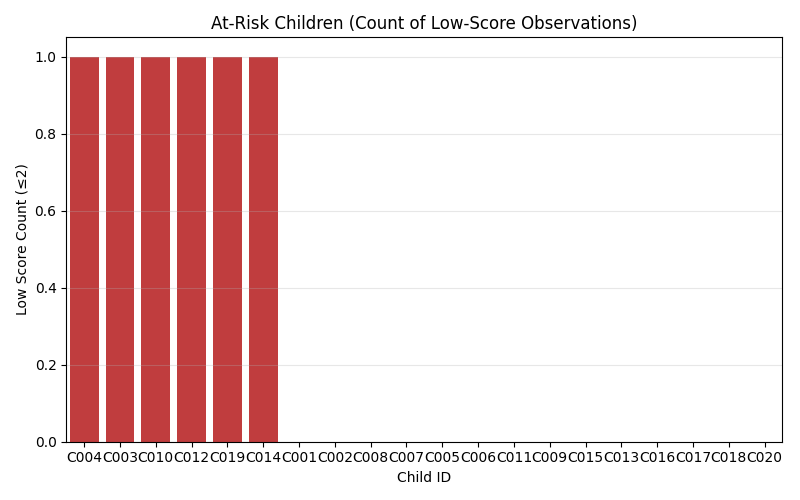

<Figure size 800x500 with 0 Axes>

In [9]:
#@title Generating the graphs
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Image

# ===============================
# CONFIG
# ===============================
output_dir = Path("charts")
output_dir.mkdir(exist_ok=True)

# Ensure numeric types
df["Emotional_Regulation_Score"] = pd.to_numeric(df["Emotional_Regulation_Score"], errors="coerce")
df["Social_Integration_Score"] = pd.to_numeric(df["Social_Integration_Score"], errors="coerce")

# ===============================
# 2. Chart 1 – Average Scores Over Time
# ===============================
avg_by_date = df.groupby("Session_Date")[["Emotional_Regulation_Score", "Social_Integration_Score"]].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_by_date, x="Session_Date", y="Emotional_Regulation_Score", marker="o", label="Emotional Regulation")
sns.lineplot(data=avg_by_date, x="Session_Date", y="Social_Integration_Score", marker="o", label="Social Integration")
plt.title("Average Scores Over Time")
plt.xlabel("Session Date")
plt.ylabel("Average Score (1–5)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / "chart_trends.png")
plt.close()

# ===============================
# 3. Chart 2 – Average Scores by Child
# ===============================
avg_by_child = df.groupby("Child_ID")[["Emotional_Regulation_Score", "Social_Integration_Score"]].mean().reset_index()

plt.figure(figsize=(8,5))
avg_by_child.plot(
    x="Child_ID",
    kind="bar",
    stacked=False,
    color=["#1f77b4","#ff7f0e"],
    figsize=(8,5)
)
plt.title("Average Emotional vs Social Scores by Child")
plt.xlabel("Child ID")
plt.ylabel("Average Score (1–5)")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / "chart_child_avg.png")
plt.close()

# ===============================
# 4. Chart 3 – Resilience Summary Frequency
# ===============================
res_counts = df["Resilience_Notes_Summary"].value_counts().reset_index()
res_counts.columns = ["Resilience_Notes_Summary", "Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=res_counts, x="Count", y="Resilience_Notes_Summary", color="#4C72B0")
plt.title("Resilience Summary Frequency")
plt.xlabel("Number of Mentions")
plt.ylabel("Resilience Summary")
plt.tight_layout()
plt.savefig(output_dir / "chart_resilience.png")
plt.close()

# ===============================
# 5. Chart 4 – At-Risk Children (Scores ≤ 2)
# ===============================
df["At_Risk"] = (df["Emotional_Regulation_Score"] <= 2) | (df["Social_Integration_Score"] <= 2)
at_risk = df.groupby("Child_ID")["At_Risk"].sum().reset_index().sort_values("At_Risk", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=at_risk, x="Child_ID", y="At_Risk", color="#D62728")
plt.title("At-Risk Children (Count of Low-Score Observations)")
plt.xlabel("Child ID")
plt.ylabel("Low Score Count (≤2)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / "chart_at_risk.png")
plt.close()

# ===============================
# 6. Summary
# ===============================
print("✅ Charts generated and saved in:", output_dir.resolve())
for file in output_dir.iterdir():
    print("-", file.name)

# Display charts
display(Image(filename=output_dir / "chart_trends.png"))
display(Image(filename=output_dir / "chart_child_avg.png"))
display(Image(filename=output_dir / "chart_resilience.png"))
display(Image(filename=output_dir / "chart_at_risk.png"))

In [10]:
# ===============================
# 7. Auto-Generated Insights (Local)
# ===============================
import numpy as np

insights = []

# Trend analysis
trend = avg_by_date["Emotional_Regulation_Score"].iloc[-1] - avg_by_date["Emotional_Regulation_Score"].iloc[0]
if trend > 0.3:
    insights.append(f"Overall emotional regulation improved by {trend:.1f} points across sessions.")
elif trend < -0.3:
    insights.append(f"Overall emotional regulation decreased by {abs(trend):.1f} points, suggesting higher emotional volatility.")
else:
    insights.append("Emotional regulation scores remained relatively stable throughout the sessions.")

# Top performer
top_child = avg_by_child.loc[avg_by_child["Social_Integration_Score"].idxmax()]
insights.append(f"Child {top_child['Child_ID']} demonstrated the strongest social integration (avg {top_child['Social_Integration_Score']:.1f}/5).")

# At-risk children
risk_children = at_risk[at_risk["At_Risk"] >= 2]["Child_ID"].tolist()
if risk_children:
    insights.append(f"Children showing multiple low-score events (≤2) include: {', '.join(risk_children)}.")

# Display
print("\n📊 AUTO-GENERATED INSIGHTS:\n")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

# Optionally save to file
with open(output_dir / "insights_summary.txt", "w") as f:
    for insight in insights:
        f.write(insight + "\n")
print("\n✅ Insights saved to:", output_dir / "insights_summary.txt")


📊 AUTO-GENERATED INSIGHTS:

1. Emotional regulation scores remained relatively stable throughout the sessions.
2. Child C006 demonstrated the strongest social integration (avg 5.0/5).

✅ Insights saved to: charts/insights_summary.txt
